# Miniproject 2

first name: Sébastien

last name: Emery

sciper: 258565

date: 15.06.2020

*Your teammate*

first name of your teammate: Diego

last name of your teammate: Canton

sciper of your teammate: 259304


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Miniprojet2_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

https://lcn-neurodynex-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# PART 1: Coronavirus, epidemiology  and neural networks  [75 points]
In this exercise we will study the Coronavirus pandemic. This worldwide epidemy (left figure) is to be taken seriously and these exercise are made to show you the importance of acting fast and hard. You can follow the evolution in real time on the following [website](https://ncov2019.live/data).
One key action we can do is what has been called flatten the curve (right figure):
<div>
<img align='right' src="https://ourworldindata.org/uploads/2020/03/Flattening-the-curve-3-2048x1434.png" alt="drawing" width="400"/>
<img align='left' src="https://i.insider.com/5e6f8ee1c48540116e247a42?width=2500&format=jpeg&auto=webp" alt="drawing" width="350"/>
</div>

How and why flattenning this curve is important has been explained in Wulfram's extra [presentation](https://drive.switch.ch/index.php/s/fIkyRGPbepHOoDc). In this exercise we simulate the [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) a well known and fairly understable model in epidemiology. 

First run the code running simulating the fitzhugh_nagumo equations below to make sure everything is installed properly on your computer.

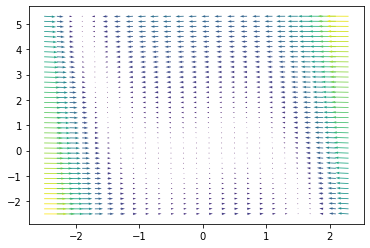

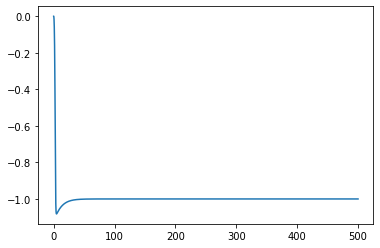

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo
import matplotlib
import networkx as nx 
import matplotlib.pyplot as plt 
import tqdm
fitzhugh_nagumo.plot_flow()
fixed_point = fitzhugh_nagumo.get_fixed_point()
plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

# Exercise 1.1 SIR phase plane [8 points]
Now we start the real work! The module [`neurodynex3.phase_plane_analysis.fitzhugh_nagumo `](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.phase_plane_analysis.html) allows us to compute the phase plane flow of fitzhugh_nagumo equations.We are going to use it to plot the SIR model behavior.\
The SIR model can be written as follow:

$\frac{dI}{dt} = \frac{\beta}{N}SI - \gamma I$\
$\frac{dS}{dt} = - \frac{\beta}{N}SI$

1.1.1 Give an intuition behind the constants $\beta$ and $\gamma$ [2 points] (< 2 lines)

1.1.2 We often hear about the $R_0$ of an epidemy, in the SIR model $R_0 = \frac{\beta}{\gamma}$ Give an intuition behind this constant. [2 points] (< 2 lines)

1.1.3 Copy the function [`plot_flow()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.phase_plane_analysis.html), replace the fitzhugh nagumo model by the SIR model and plot the flow. [4 points]


your answer for 1.1.1 and 1.1.2

<b>Answer 1.1.1</b>   
$\beta$ can be seen as the probability of infection (infectivity) during an encounter of a susceptible person with an infected one which is proportional to $SI$ and $\gamma$ can be seen as the probability that a infected person recovers or more precisely the per capita recovery rate, then $\gamma I$ is the overrall recovery rate.

<b>Answer 1.1.2</b>   
$R_0$ is the basic reproduction number and it represent the typical number of people a single infected patient can infect during the time of his/her infection. It is the product of the infectivity ($\beta$) times the the time of infection ($1/\gamma$).

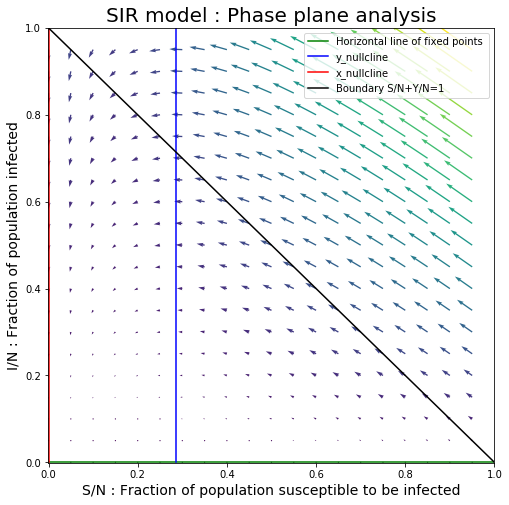

In [2]:
#1.1.3 plot flow

gamma = 1.0/20
beta = 3.5 * gamma
N = 1e7

def plot_flow(beta, gamma, n):
    """Plots the phase plane of the SIR model
    for given model parameters.

    Args:
        Beta: infectivity
        Gamma: recovery rate per capita
        N: Total population
    """
    
    # compute R_0 which is the typical number of people a single patient can infect during the duration of his/her infection
    R_0 = beta/gamma
    
    # define the interval spanned by the susceptible fraction x and the infected fraction y
    # to produce the phase plane
    xx = np.arange(0, 1, 0.05)
    yy = np.arange(0, 1, 0.05)
    (XX, YY) = np.meshgrid(xx, yy)

    # Compute derivative of v and w according to FHN equations
    # and velocity as vector norm
    dX = -(beta*XX*YY)
    dY = beta*YY*(XX-1./R_0)
    vel = np.sqrt(dX**2 + dY**2)
    
    #nullclines
    x = np.arange(0.0,1.1, 0.05)  # create an array of x values
    x_nullcline1 = 0.0*x
    y_nullcline1 = 0.0*x
    y_nullcline2 = np.full((x.shape[0]),1.0/R_0)

    plt.figure(figsize=(8,8))
    
    plt.plot(x, y_nullcline1, color='green',label ='Horizontal line of fixed points ')
    plt.plot(y_nullcline2, x, color='blue',label ='y_nullcline')
    plt.plot(x_nullcline1, x, color = 'red',label ='x_nullcline')
    
    # Boundary line where the total fraction of both population is greater than one (not allowed)
    plt.plot(x,1-x, color = 'black', label ='Boundary S/N+Y/N=1')

    # Use quiver function to plot the phase plane
    plt.quiver(XX, YY, dX, dY, vel)
    plt.title("SIR model : Phase plane analysis",fontsize = 20)
    plt.xlim(-0.001,1.0)
    plt.ylim(-0.001,1.0)
    plt.xlabel("S/N : Fraction of population susceptible to be infected",fontsize = 14)
    plt.ylabel("I/N : Fraction of population infected",fontsize = 14)
    plt.legend()
    plt.show

plot_flow(beta, gamma, N)

# Exercise 1.2 SIR Trajectory [15 points]
In order to plot the trajectory of a given initial condition we use a simple [forward euler](http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node3.html) to solve the SIR model over time.

#### for all 1.2 questions we use $\gamma = \frac{1}{20}$, $I_0 = 100$ and $N=10^7$


1.2.1 Fill the question marks in the function `get_trajectory()` below so that the function returns the trajectory $(S(t), I(t))$ from an initial point $S_0$, $I_0$.  (initial number of non infected/infected)[7 points]

1.2.2 Plot on the same graph the phase plane trajectory of an epidemy for given $R_0$s and $I_0$. [2 points]

1.2.3 Plot on the same graph the evolution on infected people over time for given $R_0$s and $I_0$. [2 points]

Flattening the curve allows to avoid high peak of infected people at the same time. Here, we want to show that acting on $R_0$ allows great flattening of the curve.

1.2.4 Add on the graph of 1.2.3 an horizontal line showing a theoretical 10% of the population hospital saturation threshold. [1 point]

1.2.5 Comment [3 points] (< 3 lines)

In [3]:
## 1.2.1
def get_trajectory(gamma, R0, I0, N, tend=1000):
    
    record = {}
    record['t'] = []
    record['I'] = []
    record['S'] = []
    record['R'] = []

    beta = R0*gamma
    dt = 0.1 ## forward euler time step
    S = N-I0
    I = I0
    
    for i in range(tend):
        for step in range(int(1/dt)):   
            record['t'] += [i+step*dt]
            record['I'] += [I]
            record['S'] += [S]
            record['R'] += [int(N-S-I)]
            dIdt = ((beta/N)*S*I-gamma*I)*dt
            dSdt = -(beta/N)*S*I*dt
            new_S = S+dSdt
            new_I = I+dIdt
            S = new_S
            I = new_I
             
    return np.array([np.array(record['t']), np.array(record['S']), np.array(record['I'])])

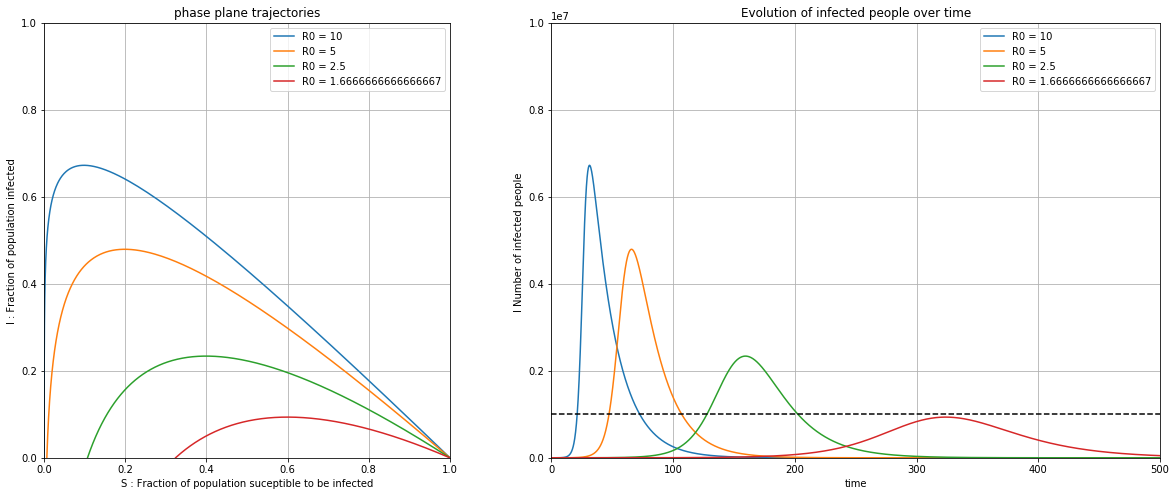

In [4]:
## 1.2.2, 1.2.3 and 1.2.4
N = 1e7
I0 = 100
R0s = [10,5,5/2,5/3]
gamma = 1.0/20

#1.2.2
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(20,8), gridspec_kw={'width_ratios': [2, 3]})
ax = axes.ravel()
for ro in R0s:
    time_SIR, S_SIR, I_SIR = get_trajectory(gamma, ro, I0, N)
    ax[0].plot(S_SIR/N, I_SIR/N, label='R0 = {r}'.format(r=ro))
    ax[1].plot(time_SIR, I_SIR, label='R0 = {r}'.format(r=ro))

ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_xlabel('S : Fraction of population suceptible to be infected')
ax[0].set_ylabel('I : Fraction of population infected', rotation=90)
ax[0].grid(True, which='both')
ax[0].set_title("phase plane trajectories")
ax[0].legend()

ax[1].axhline(0.1*N, color='black', linestyle = 'dashed') #Threshold at 10% of the population
ax[1].set_xlim([0, 500])
ax[1].set_ylim([0, N])
ax[1].set_xlabel('time')
ax[1].set_ylabel('I Number of infected people ', rotation=90)
ax[1].grid(True, which='both')
ax[1].set_title("Evolution of infected people over time")
ax[1].legend()

plt.show()

<b>Answer 1.2.5</b>   
Diminishing the value of $R_0$ (increasing the value of $1/R_0$) flattens the peak of the evolution of infected people over time and for the lowest value (Ro = 5/3) the healthcare system would not be overloaded. This is due to the shift to the right to the y-nullcline ($y =1/R_0$) which dictate the direction of the flow. On the right it directed upward to the left and on the left it is downard to the left. Therefore, increasing it makes the trajectory to decrease earlier for the I axis.

# Exercise 1.3 SIR Analysis [18 points]

Now that you are a bit familiar with the SIR model, we want to do a bit of analysis over the parameters. Every action (or policies), done by a government allows to act on the $R_0$ of the model. 
- First, we want you to run trajectories for different actions of a government. We consider an action when the government acts on $R_0$ for a given time, e.g. quarantine of the population.

#### for all 1.3 questions we use $\gamma = \frac{1}{20}$, $I_0 = 100$ and $N=10^7$

1.3.1 Update the `get_trajectory` function so that $R_0$ can change during the simulation (look at the modulation dictionary), now `get_trajectory` should return the maximum of the infected peak. [2 points]

1.3.2 Run the trajectories for a policy $R_0$ from $2.3$ (estimated value of $R_0$ for no actions) to $0.5$ (strong quarantine policy) and time of policy from $1$ to $200$ days. [2 points]

1.3.3 Plot the 2D matrix of maximum infected cases obtained in question 1.3.2. On the x axis we want the duration of quarantine, and $R_0$ on the y axis. Comment [2 + 3 points] (< 3 lines)

1.3.4 In question 1.3.2 we consider that people go back to their usual life at the end of the quarantine $R_0$ back to $2.3$. Now add a transition phase where people are "careful", $R_0$ of $1.5$ for 150 days, do you see any difference? [2 points] (< 1 line)

Now we study the impact of a delay in the intervention after the outbreak. In other words, we want to know how long we can wait before a government takes actions.

1.3.5  Run the trajectories for a policy $R_0$ from $2.3$ (estimated value of $R_0$ for no actions) to $0.5$ (strong quarantine policy) and time $\textbf{before we start the quarantine}$ from $1$ to $200$ days. In this question we consider a quarantine duration of 50 days. Plot the 2D matrix of maximum infected cases. On the x axis we want the time before the start of quarantine, and $R_0$ on the y axis. $\textbf{For both careful and non careful population}$.
Comment [2 + 3 points] (< 3 lines)

1.3.6 Design a government policy so that the amount of infected people never goes above 6% of the population, $\textbf{for both careful and non careful population}$ Comment. [2 points] (< 2 lines)

$\textbf{Constraints:}$ 
1. Max quarantine time 50 days with min $R_0 = 0.5$
2. For careful transition max time $100$ days and min $R_0= 1.5$. 

In [5]:
## 1.3.1
def get_trajectory3_1(gamma, R0, I0, N, tend=1000, modulation=False):
    record = {}
    record['t'] = []
    record['I'] = []
    record['S'] = []
    record['R'] = []
    beta = R0*gamma
    dt = 0.01 ## forward euler time step
    S = N-I0
    I = I0
    
    for i in range(tend):
        if modulation:
            for k in range(len(modulation["days"])):
                if np.logical_and(i >= sum(modulation["days"][0:k]), i < sum(modulation["days"][0:k+1])):
                    beta = modulation["R0"][k]*gamma
                           
        for step in range(int(1/dt)):   
            record['t'] += [i+step*dt]
            record['I'] += [I]
            record['S'] += [S]
            record['R'] += [int(N-S-I)]
            dIdt = ((beta/N)*S*I-gamma*I)*dt
            dSdt = -(beta/N)*S*I*dt
            new_S = S+dSdt
            new_I = I+dIdt
            S = new_S
            I = new_I
                  
    return np.array(record['t']), np.array(record['S']), np.array(record['I']), np.amax(np.array(record['I']))

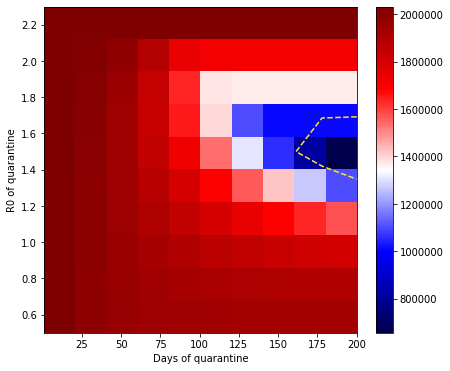

In [6]:
# 1.3.2 + 1.3.3
N =1e7
R0s = np.linspace(2.3,0.5,10)
policy_days = np.linspace(1,200,10)
I0 = 100
gamma = 1.0/20.0

modulation = {}
mip = np.zeros((R0s.shape[0], policy_days.shape[0]))

for n, ro in enumerate(R0s):
    for m, pd in enumerate(policy_days):
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [100, int(pd), 1000-int(pd)-100]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3, ro, 2.3]
        
        _, _, _, mip[n,m] = get_trajectory3_1(gamma, R0s[0], I0, N, tend=1000, modulation=modulation)

plt.figure(figsize=(7,6))
plt.imshow(mip,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto', cmap ='seismic')
plt.xlabel('Days of quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days, R0s, mip, [0.0,0.1*N], linestyles = 'dashed') ## shows 10% contour
plt.show()

<b>Answer 1.3.3</b>  
From the heatmap above, we can observe two things. First, the longer the quarantine last, the lower the peak of infected people will be over the studied period (1000 days). So, the government should make the quarantine last as long as possible. Secondly, we observe that a moderate quarantine policy will have more influence on the infection peak than a strong quarantine policy (R0 = 0.5). Indeed, the yellow dashed contour shows us that a policy between 1.4 and 1.7 keep the infected peak lower than 10% of the population. To see why a strong policy will not necessarly make the infection peak lower, we can plot the infection over time for different values of RO as in 1.2. 

WARNING    /opt/anaconda3/envs/bmnn/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


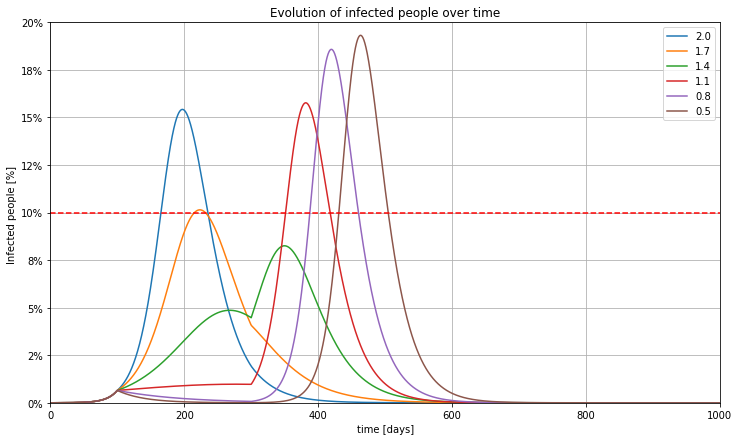

In [7]:
# 1.3.3 infections over time

R0s = np.linspace(2.0,0.5,6)

fig, ax = plt.subplots(ncols=1, figsize=(12,7))

for ro in R0s:

    modulation = {}
    modulation['days'] = [100, 200, 700]  
    modulation['R0'] = [2.3, ro, 2.3]

    t, _, i, _ = get_trajectory3_1(gamma, modulation['R0'][0], I0, N, tend=1000, modulation=modulation)
    ax.plot(t, i, label=str(ro))

ax.axhline(0.1*N, color='r', linestyle = 'dashed') #Threshold at 10% of the population
ax.set_xlim([0, 1000])
ax.set_ylim([0, 0.2*N])
ax.set_yticklabels(['{:.0f}%'.format((x/N)*100) for x in ax.get_yticks()])
ax.set_xlabel('time [days]')
ax.set_ylabel('Infected people [%] ', rotation=90)
ax.grid(True, which='both')
ax.set_title("Evolution of infected people over time")

plt.legend()
plt.show()

We observe that for a strong policy during the quarantine period the number of infected person stays constant or decreases, so the exponential phase of the model is just delayed and the peak of infection happens after the quarantine. 

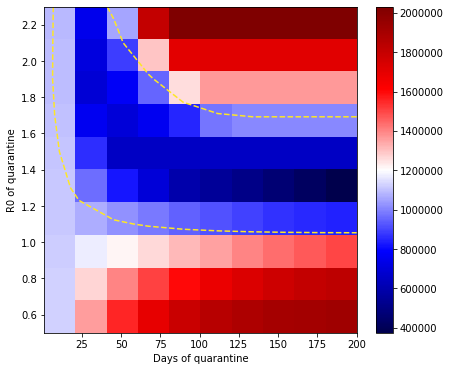

In [8]:
# 1.3.4 Careful population

N =1e7
R0s = np.linspace(2.3,0.5,10)
policy_days = np.linspace(1,200,10)
modulation = {}
I0 = 100
gamma = 1.0/20.0
mip = np.zeros((R0s.shape[0], policy_days.shape[0]))

for n, ro in enumerate(R0s):
    for m, pd in enumerate(policy_days):
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [100, int(pd), 150, 1000-int(pd)-250]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3, ro, 1.5, 2.3]
        
        _, _, _, mip[n,m] = get_trajectory3_1(gamma, R0s[0], I0, N, tend=1000, modulation=modulation)

plt.figure(figsize=(7,6))
plt.imshow(mip,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days of quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days, R0s, mip, [0.0,0.1*N], linestyles = 'dashed') ## shows 10% contour
plt.show()

<b>Answer 1.3.4</b>   
As for the case where population is not careful, the longer the quarantine the better and a moderate government policy has more influence than a strong policy. But what we observe is that overall there will be less infections over the studied period (1000 days). Therefore, if the quarantine is followed by a period of 150 days where people are careful even for a short quarantine, the peak of infection can be maintained under the 10% limit. The lowest peak is here at ~400'000 people vs ~700'000 for the not careful population. 

WARNING    <ipython-input-9-260182fc5ab6>:43: UserWarning: No contour levels were found within the data range.
  plt.contour(policy_days, R0s, mip_not, [0,0.1*N], linestyles = 'dashed') ## shows 10% contour
 [py.warnings]


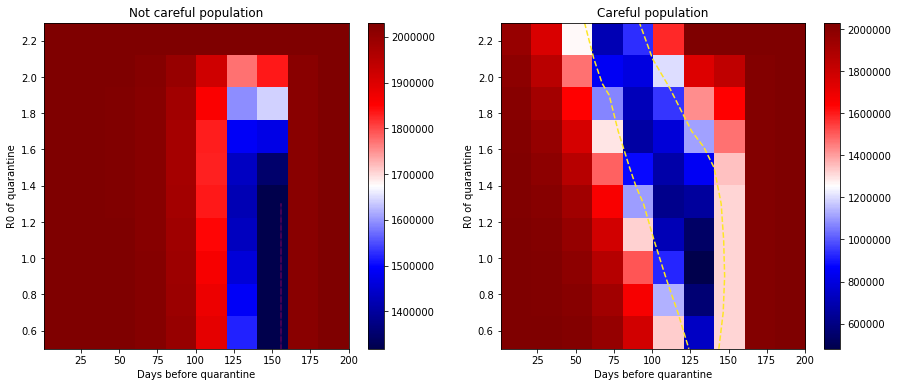

In [9]:
# 1.3.5 - Days before quarantine

N =1e7
R0s = np.linspace(2.3,0.5,10)
policy_days = np.linspace(1,200,10)
I0 = 100
gamma = 1.0/20.0

modulation_not = {}
modulation_care = {}
mip_not = np.zeros((R0s.shape[0], policy_days.shape[0]))
mip_care = np.zeros((R0s.shape[0], policy_days.shape[0]))

for n, ro in enumerate(R0s):
    for m, pd in enumerate(policy_days):
        
        #Not Careful Populaiton
        
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation_not['days'] = [int(pd), 50, 1000-int(pd)-50]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation_not['R0'] = [2.3, ro, 2.3]
                   
        _, _, _, mip_not[n,m] = get_trajectory3_1(gamma, R0s[0], I0, N, tend=1000, modulation=modulation_not)
        
        #Careful Population 
                   
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation_care['days'] = [int(pd), 50, 150, 1000-int(pd)-200]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation_care['R0'] = [2.3, ro, 1.5, 2.3]
        
        _, _, _, mip_care[n,m] = get_trajectory3_1(gamma, R0s[0], I0, N, tend=1000, modulation=modulation_care)


plt.figure(figsize=(15,6))

plt.subplot(121)                    
plt.imshow(mip_not,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days before quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days, R0s, mip_not, [0,0.1*N], linestyles = 'dashed') ## shows 10% contour
plt.title('Not careful population')
                   
plt.subplot(122)                    
plt.imshow(mip_care,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days before quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days, R0s, mip_care, [0,0.1*N], linestyles = 'dashed') ## shows 10% contour
plt.title('Careful population')
plt.show()         

<b>answer 1.3.5</b>   
We observe that is better to wait some time before starting the quarantine period. Maybe because as for 1.3.3, if we start the quarantine when there is not enough infections, the exponential phase would be delayed after the quarantine. We also observe that the more we wait the stronger the policy should be (we see it clearly on the right plot)

WARNING    <ipython-input-10-0746567bb8bc>:25: UserWarning: No contour levels were found within the data range.
  plt.contour(policy_days, R0s, mip, [0,0.06*N], linestyles = 'dashed') ## shows 6% contour
 [py.warnings]


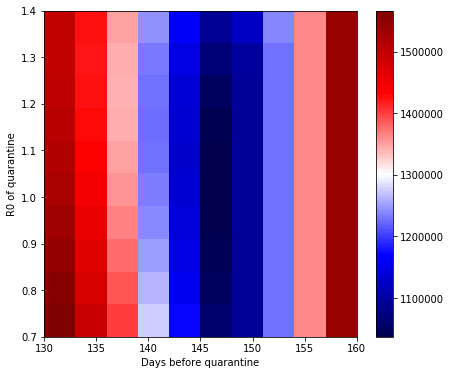

In [10]:
# 1.3.6 - Not Careful population - Trying to find the best parameters to design a government policy

N =1e7
R0s = np.linspace(1.4,0.7,10)
policy_days = np.linspace(130,160,10)
modulation = {}
I0 = 100
gamma = 1.0/20.0
mip = np.zeros((R0s.shape[0], policy_days.shape[0]))

for n, ro in enumerate(R0s):
    for m, pd in enumerate(policy_days):
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [int(pd), 50, 1000-int(pd)-50]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3, ro, 2.3]
        
        _, _, _, mip[n,m] = get_trajectory3_1(gamma, R0s[0], I0, N, tend=1000, modulation=modulation)

plt.figure(figsize=(7,6))
plt.imshow(mip,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days before quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days, R0s, mip, [0,0.06*N], linestyles = 'dashed') ## shows 6% contour
plt.show()

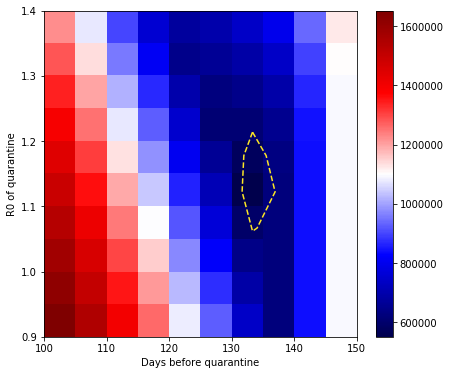

In [11]:
# 1.3.6 - Careful population - Trying to find the best parameters to design a government policy

N =1e7
R0s = np.linspace(1.4,0.9,10)
policy_days = np.linspace(100,150,10)
modulation = {}
I0 = 100
gamma = 1.0/20.0
mip = np.zeros((R0s.shape[0], policy_days.shape[0]))

for n, ro in enumerate(R0s):
    for m, pd in enumerate(policy_days):
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [int(pd), 50, 100, 1000-int(pd)-150]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3, ro, 1.5, 2.3]
        
        _, _, _, mip[n,m] = get_trajectory3_1(gamma, R0s[0], I0, N, tend=1000, modulation=modulation)

plt.figure(figsize=(7,6))
plt.imshow(mip,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days before quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(policy_days, R0s, mip, [0,0.06*N], linestyles = 'dashed') ## shows 6% contour
plt.show()

WARNING    /opt/anaconda3/envs/bmnn/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


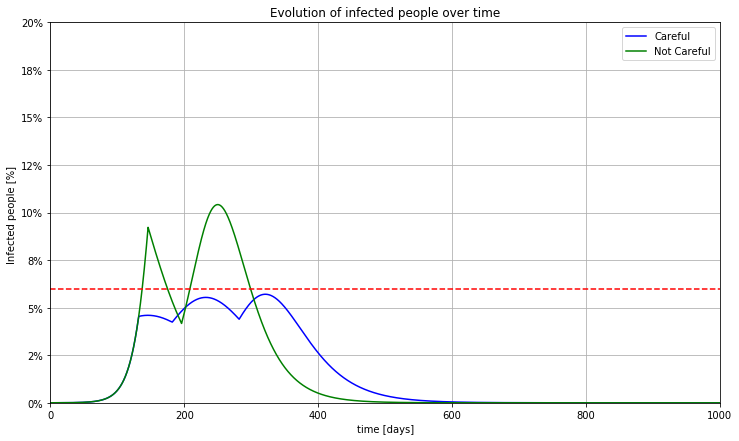

In [12]:
# 1.3.6 - infected people over time - Careful and not careful population

N = 1e7
I0 = 100
gamma = 1.0/20.0

# Careful
modulation = {}
modulation['days'] = [132, 50, 100, 718]  
modulation['R0'] = [2.3, 1.13, 1.5, 2.3]

# Not careful
modulation2 = {}
modulation2['days'] = [146, 50, 804]  
modulation2['R0'] = [2.3, 0.9, 2.3]

fig, ax = plt.subplots(ncols=1, figsize=(12,7))

# Careful
t, _, i, _ = get_trajectory3_1(gamma, modulation['R0'][0], I0, N, tend=1000, modulation=modulation)
ax.plot(t, i, label="Careful", color='b')

# Not careful
t2, _, i2, _ = get_trajectory3_1(gamma, modulation2['R0'][0], I0, N, tend=1000, modulation=modulation2)
ax.plot(t2, i2, label="Not Careful", color='green')

ax.axhline(0.06*N, color='r', linestyle = 'dashed') #Threshold at 6% of the population
ax.set_xlim([0, 1000])
ax.set_ylim([0, 0.2*N])
ax.set_yticklabels(['{:.0f}%'.format((x/N)*100) for x in ax.get_yticks()])
ax.set_xlabel('time [days]')
ax.set_ylabel('Infected people [%] ', rotation=90)
ax.grid(True, which='both')
ax.set_title("Evolution of infected people over time")

plt.legend()
plt.show()

<b>Answer 1.3.6</b>   
With the heatmaps, we found the parameters that kept the peak of infection the lowest possible and we can visualize infections over time to see that only in the case where the population is careful the peak goes under the 6% limit. We couldn't find any parameters to get the none careful population under the limit, which shows the importance of having a phase where population stays careful after the quarantine. 

# Exercise 1.4 Model infections with Networks [17 points]

So far we have studied a simple model of infection. This model is a simplification of propagation of an infection in a fully connected graph. We are now going to implement two types of graph and compare the results to the SIR model.
For this we need the python library [networkx](https://networkx.github.io/) and for comfort [tqdm](https://pypi.org/project/tqdm/)
(simply use pip install networkx and pip install tqdm in your terminal).

The study of the graphs allows a better understanding of the [importance of social distancing](https://corona.katapult-magazin.de/).
<div>
 <figure style="width:50%;
    float:left;
    margin:0px;
    text-align:center;
    padding:0px;" >
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Erdos_generated_network-p0.01.jpg">
  <figcaption >Example Erdős–Rényi graph.</figcaption>
</figure> 
 <figure style="width:50%;
    float:left;
    margin:0px;
    text-align:center;
    padding:0px;" >
  <img style="width:50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/18-vertex_zero-symmetric_graph.svg/200px-18-vertex_zero-symmetric_graph.svg.png">
  <figcaption >Example of a K-connected graph.</figcaption>
</figure> 
   </div>

1.4.1 In the part we implement 2 different graphs:
- Erdős–Rényi graph: random connected graph, with sparsity $s$.
- random regular graph: random connected graph with $\textbf{exactly } K$ connections per neuron.

create the 2 graphs, with sparsity $s=0.1$ and $N=50$ nodes and plot it [1 point]
(keep this number of nodes more is really long to run).

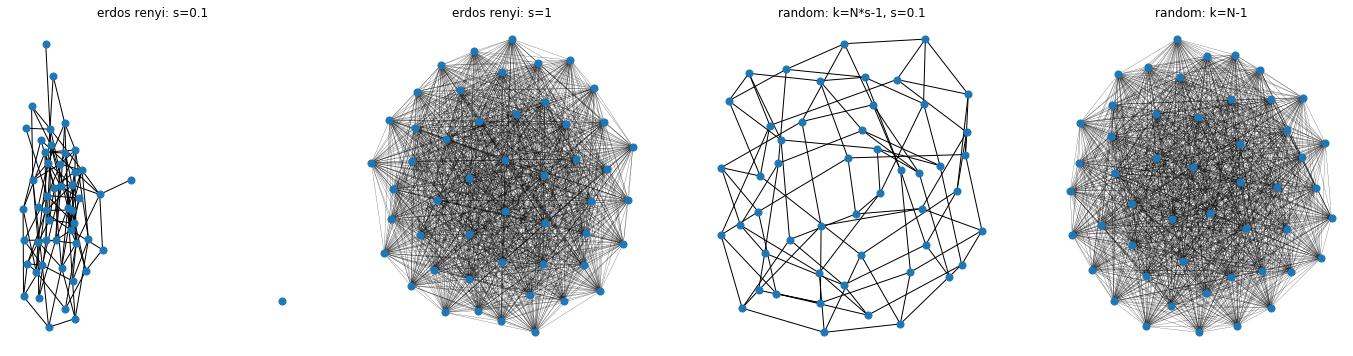

In [2]:
import tqdm
import networkx as nx 
N = 50
s = 0.1
G0 = nx.erdos_renyi_graph(N, s)
G4 = nx.erdos_renyi_graph(N, 1.0)
G1 = nx.random_regular_graph(int(N*s-1), N, 0) 
G2 = nx.random_regular_graph(N-1, N, 0)

plt.figure(figsize=(24,6))

plt.subplot(141) 
nx.draw(G0, node_size=50)
plt.title("erdos renyi: s=0.1")

plt.subplot(142) 
nx.draw(G4, node_size=50, width=0.2)
plt.title("erdos renyi: s=1")

plt.subplot(143)
nx.draw(G1, node_size=50)
plt.title("random: k=N*s-1, s=0.1")

plt.subplot(144)
nx.draw(G2, node_size=50, width=0.2)
plt.title("random: k=N-1")

plt.show()

In order to simulate the propagation of a disease we consider that at each time step we run over the infected nodes. Each infected node $n_1$ can infect a susceptible connected node $n_2$ with probability:

$P(n_2 = S\rightarrow n_2 = I|n_1 = I) = \frac{\beta \Delta_t}{N\cdot s}$.

$P(n_2 = S\rightarrow n_2 = I|n_1 = S) = 0$,

where s is the sparsity of the network. Each infected node $n_1$ has the probability to be cured:

$P(n_1 = I\rightarrow n_1 = C) = \gamma  \Delta_t$

where $I$ stands for the infected node, $S$ the susceptible nodes and $C$ the cured ones.

1.4.2 Pen&pencil. Show that for a small $\Delta t$ and a fully connected graph with large $N$ the network behaves exactly as the SIR model. [3 points]

1.4.3 Fill the function `simulation_graph` according to the properties we defined in 1.4.2. [4 points]

1.4.4 Run the simulation for fully connected graphs of $N = 100$ nodes and show that you get quantitatively the same results as the SIR model. Run the graphs 10 times for 300 days and plot the average trajectory of infected cases against the SIR model. [3 points]

1.4.5 Run the simulation for sparsely connected graphs with $s=0.1$ and $N = 100$. Explain the differences/similarities you observed.\
[1 + 2 points]

1.4.6 What is the difference between an Erdős–Rényi graph and a K-connected one if $N\rightarrow \infty$. if they are fully connected ? if they are sparsely connected ? [2 points] (< 2 lines)

<b>Answer 1.4.2</b>   

The number of interactions between $n_{1}$ and $n_{2}$ in a fully connected graph is : $n_{1} \cdot n_{2}$ <br>
At each step $\Delta_{t}$ and for each interactions, a node $n_{2}$ can become an infected node $n_{1}$ with probability $\frac{\beta\Delta_{t}}{N}$ and no infected node $n_{1}$ can become a susceptible node $n_{2}$<br>
Also, at each step $\Delta_{t}$, each infected node $n_{2}$ has probability $\gamma\Delta_{t}$ to be cured <br>
<br>
So, at for each $\Delta_{t}$, the number of infected nodes change by $n_{1}(t) \cdot n_{1}(t) \cdot \frac{\beta\Delta_{t}}{N} - n_{1}(t)\cdot\gamma\Delta_{t}$ and the number of suceptible node change by   $ - \frac{\beta\Delta_{t}}{N}\cdot n_{2}(t) \cdot n_{1}(t)$

If $I(t)$, the number of infections at time $t$ corresponds to $n_{1}(t)$ and $S(t)$, the number of suceptible person at time t correponds to $n_{2}(t)$ and $\Delta_{t}$ very small, then we have : 

$\frac{dI}{dt} = \frac{\beta}{N}SI - \gamma I$ <br>
$\frac{dS}{dt} = - \frac{\beta}{N}SI$ <br>

which is exactly the SIR model ! 

In [14]:
def simulation_graph(G, I0, R0, sparsity, tend=1000, modulation = False):
    dt = 0.01
    gamma = 1.0/20.0
    R0s = []
    average = 10 # number of run  for averaging
    arr_I = np.zeros((average,tend*int((1.0/dt)))) #save all infection history over time for each average 
    arr_S = np.zeros((average,tend*int((1.0/dt)))) #save all susceptible history over time for each trial 
    N = G.number_of_nodes()
    
    for trial in tqdm.tqdm(range(average)):
        I_t = []
        S_t = []
        infected = list(range(I0))
        susceptible = np.arange(0, N)
        susceptible = [x for x in susceptible if x not in infected] # no infected in susceptible
        cured = []
        
        for i in range(tend):
            if modulation:
                for k in range(len(modulation["days"])):
                    if np.logical_and(i >= sum(modulation["days"][0:k]), i < sum(modulation["days"][0:k+1])):
                        R0 = modulation["R0"][k]
            
            R0s += [R0]
            beta = R0*gamma
            
            for j in range(int(1.0/dt)):
                tmp_infected = []
                tmp_cured = []
                for node in G.adj: ## run over all connections of a node
                    if node in infected:
                        # Each susceptible node conceted to an infected node can be infected with a certain prob.
                        for S_node in G.adj[node]:
                            if np.random.rand() < (beta*dt)/(sparsity*N) and (S_node in susceptible):
                                    tmp_infected.append(S_node)
                        if np.random.rand() < gamma*dt:
                            tmp_cured.append(node)
                
                cured += tmp_cured
                infected += tmp_infected
                infected  = [x for x in infected if x not in cured]
                susceptible = [x for x in susceptible if x not in infected and x not in cured]
                
                I_t += [len(infected)]
                S_t += [len(susceptible)]
            
        arr_I[trial,:] = np.array(I_t)
        arr_S[trial,:] = np.array(S_t)
    
    return arr_S, arr_I

100%|██████████| 10/10 [02:15<00:00, 13.58s/it]


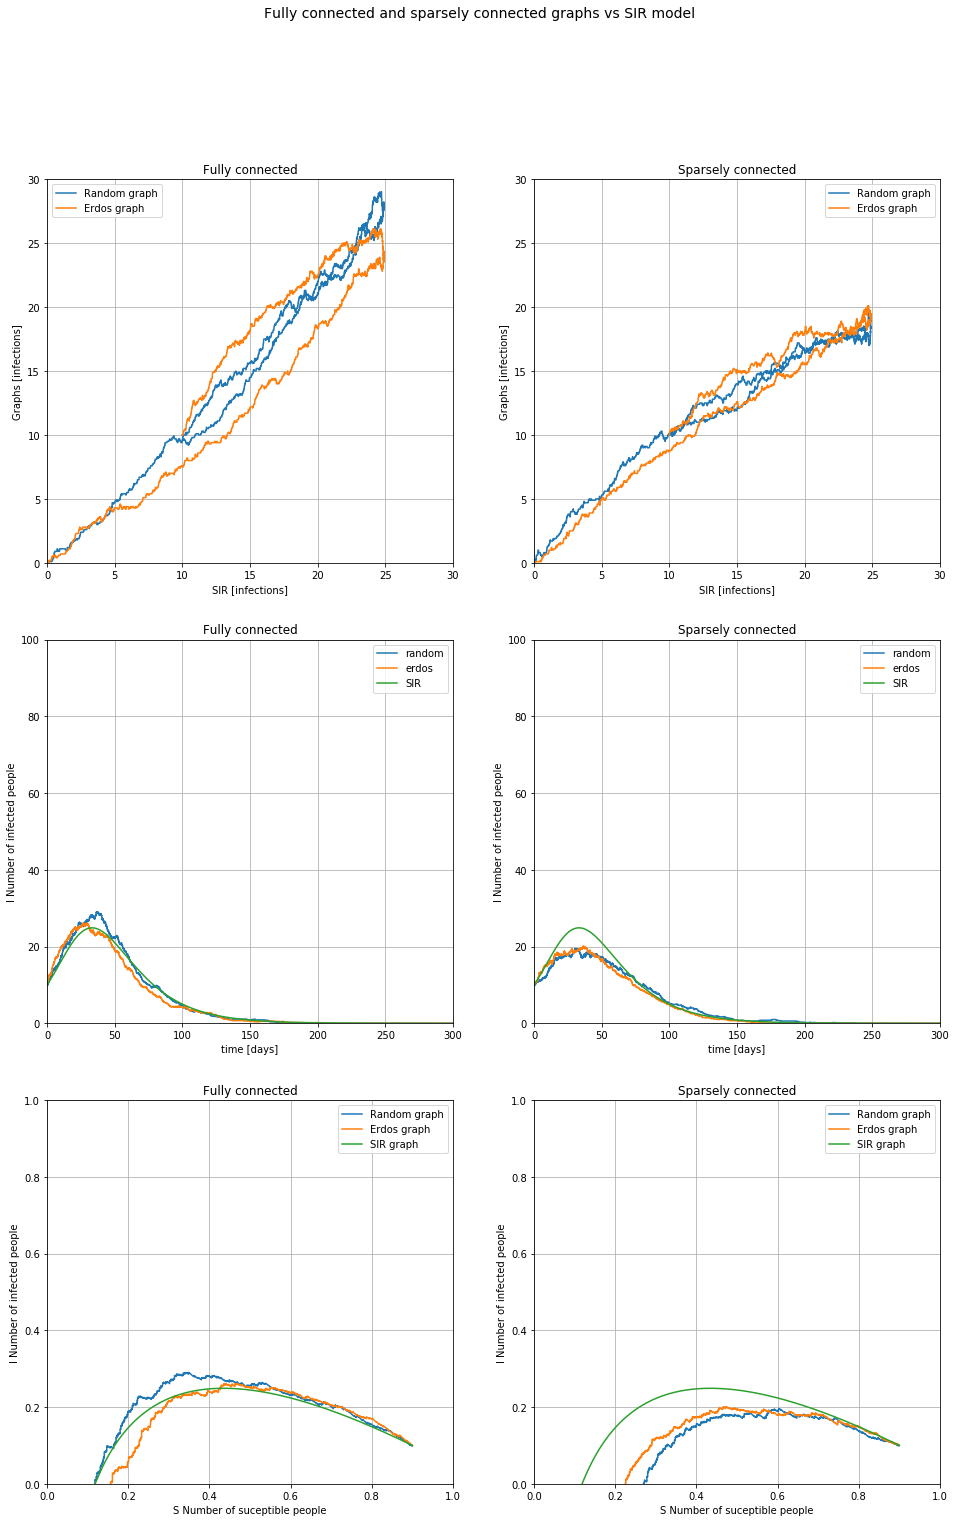

In [15]:
# 1.4.4 - 1.4.5 : Fully connected and sparsely connected graphs vs SIR 

N = 100
I0 = 10 #We start with 10 infected person
R0 = 2.3
tend = 300
gamma = 1.0/20.0
sparsity = [1.0, 0.1]

titles = ['Fully connected', 'Sparsely connected', 'Fully connected : infections overs time', 'Sparsely connected : infections over time', 'Fully connected : trajectories', 'Sparsely connected : trajectories']

t = np.linspace(0,tend,tend*100)

fig, axes = plt.subplots(3, 2, figsize=(16,24))
ax = axes.ravel()

for ind, s in enumerate(sparsity): 

    # Random 
    G_rand = nx.random_regular_graph(int(N*s)-1, N, 0)
    
    # Erdos
    G_erdos = nx.erdos_renyi_graph(N, s)


    # Random simulation
    S_rand, I_rand = simulation_graph(G_rand, I0, R0, s, tend, modulation = False)
    I_rand = np.mean(I_rand,0)
    S_rand = np.mean(S_rand,0)
    
    # Erdos simulation
    S_erdos, I_erdos = simulation_graph(G_erdos, I0, R0, s, tend, modulation = False)
    I_erdos = np.mean(I_erdos,0)
    S_erdos = np.mean(S_erdos,0)
    
    # SIR simulation
    _, S_SIR, I_SIR, _ = get_trajectory3_1(gamma, R0, I0, N, tend, modulation= False)
    
    # PLOT
    ax[ind].plot(I_SIR, I_rand, label = 'Random graph')
    ax[ind].plot(I_SIR, I_erdos, label = 'Erdos graph')
    
    ax[ind].set_xlim([0, 30])
    ax[ind].set_ylim([0, 30])
    ax[ind].set_xlabel('SIR [infections]')
    ax[ind].set_ylabel('Graphs [infections]')
    ax[ind].grid(True, which='both')
    ax[ind].set_title(titles[ind])
    ax[ind].legend()
    
    ax[ind+2].plot(t, I_rand, label='random')
    ax[ind+2].plot(t, I_erdos, label='erdos')
    ax[ind+2].plot(t, I_SIR, label='SIR')
    
    ax[ind+2].set_xlim([0, 300])
    ax[ind+2].set_ylim([0, 100])
    ax[ind+2].set_xlabel('time [days]')
    ax[ind+2].set_ylabel('I Number of infected people', rotation=90)
    ax[ind+2].grid(True, which='both')
    ax[ind+2].set_title(titles[ind])
    ax[ind+2].legend()
    
    ax[ind+4].plot(S_rand/N, I_rand/N, label = 'Random graph')
    ax[ind+4].plot(S_erdos/N, I_erdos/N, label = 'Erdos graph')
    ax[ind+4].plot(S_SIR/N, I_SIR/N, label = 'SIR graph')
    
    ax[ind+4].set_xlim([0, 1])
    ax[ind+4].set_ylim([0, 1])
    ax[ind+4].set_xlabel('S Number of suceptible people')
    ax[ind+4].set_ylabel('I Number of infected people', rotation=90)
    ax[ind+4].grid(True, which='both')
    ax[ind+4].set_title(titles[ind])
    ax[ind+4].legend()

fig.suptitle("Fully connected and sparsely connected graphs vs SIR model", fontsize=14)
plt.show()

<b>Answer 1.4.5</b>   
We observe that for a sparsely connected network the infection peak is lower than for a fully connected network which can be explained by the fact that in the second network, there is a lower probability to be in contact with an infectious person. We also observe that the SIR model looks more like a fully connected model, the green curve on the left plots follows the graphs curves (yellow and blue)

<b>Answer 1.4.6</b>   
If they are fully connected, there is no difference since all node are connected to all other nodes in both case, so networks are similar. In the case of sparsely connected graph, the erdos-Renyi graph could contains some isolated vertices and be disconnected but as N -> $\infty$ "the probability that a graph on n vertices with edge probability 2ln(n)/n is connected, tends to 1." (https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model#Comparison_between_the_two_models). So even for sparsely connected graph, if N -> $\infty$ the graph are similar. 

# Exercise 1.5 Non Mean field graph [19 points]

In this question we are going to design a new graph called cluster graph. We created a class cluster_Graph to allow you to have a first experience with classes in python. $\textbf{Do not hesitate to ask questions about it}$. 

1.5.1 Fill the `cluster_Graph` class so that `cluster_Graph.Matrix` returns the binary matrix of connections of a network with $C$ clusters each with the same number of nodes, where the probability of connections within a cluster is $P_{intra}$ and outside $P_{extra}$. [4 points]

#### Sparsness : The sparsness of a graph is defined as $\frac{L}{N^2}$, with $L$ the number of connections in the graph and $N^2$ maximum possible connections 

1.5.2 create one cluster graph, with 5 clusters, $N=50$ nodes, $P_{intra}$ = 1, $P_{extra}$ = 0.02 and plot it [1 point]


1.5.3 Estimate analatically the expected sparseness of the graph function of  $P_{extra}$, $P_{intra}$, the number of nodes per clusters $N_c$ and the total number of nodes $N$. [2 points]

1.5.4 Use `cluster_Graph` to create the matrix a graph of sparsity $s = 0.1$. To do so,  estimate $P_{extra}$ From 1.5.2 knowing that $N=550$ nodes divided in $11$ clusters with $P_{intra} = 1$. Run the graph 10 times for 300 days and plot the average trajectory of infected cases against the SIR model and the other graphs.
#### Important : each initial infected cases must be in the same cluster !
[2 point]


1.5.5 Plot these results against the two previous graphs and the SIR model results. [2 points]

1.5.6 Comment the differences/similarities, what is different in the cluster graph ? [5 points] (< 5 lines)

1.5.7 The last graph has a really particular topology. Yet can you make a parallel between such a graph and hopfield networks ? [3 points] (< 3 lines)

In [16]:
#1.5.1

class cluster_Graph:
    def __init__(self, N, clusters = 0, P_intra = 0.1, P_extra = 0.1):
        self.N = N
        self.nodes = np.arange(N)
        self.clusters = clusters
        self.P_intra = P_intra
        self.P_extra = P_extra 
        if clusters > 0:
                self.c_nodes = self.nodes.copy()
                self.c_nodes = self.c_nodes.reshape(clusters,-1)
        else:
            print("No cluster")
        
        self.create_graph()
    
    def create_graph(self):
        self.Matrix = np.zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(i, self.N):
                if  j != i:
                    in_cluster = False
                    
                    if self.clusters > 0:
                        in_cluster = bool(i in self.c_nodes[int(np.floor(j/self.c_nodes.shape[1])),:] and j in self.c_nodes[int(np.floor(j/self.c_nodes.shape[1])),:])
                    
                    # test if i and j are in the same cluster and test probability to create a link
                    if  in_cluster and np.random.rand() < self.P_intra:
                        self.Matrix[i,j] = self.Matrix[j,i] = 1
                   
                    # test if i and j are in different clusters and test probability to create a link
                    elif  (not in_cluster) and np.random.rand() < self.P_extra:
                        self.Matrix[i,j] = self.Matrix[j,i] = 1
                           

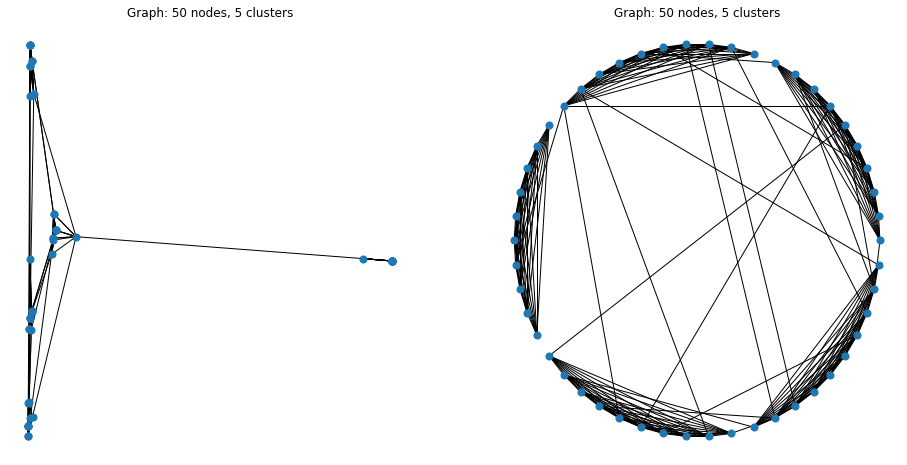

In [17]:
#1.5.2

c_mat_test = cluster_Graph(50, 5, 1, 0.02)
G_test = nx.from_numpy_matrix(c_mat_test.Matrix) #create graph from binary matrix

c_mat_clus = cluster_Graph(50, 5, 1, 0.02)
G_clus = nx.from_numpy_matrix(c_mat_clus.Matrix) #create graph from binary matrix

plt.figure(figsize=(16,8))
plt.subplot(121) 
nx.draw_spectral(G_test, node_size=50)
plt.title("Graph: 50 nodes, 5 clusters")
plt.subplot(122) 
nx.draw(G_test, pos=nx.circular_layout(G_test), node_size=50)
plt.title("Graph: 50 nodes, 5 clusters")
plt.show()

<b>Answer 1.5.3</b>   
So there are 5 clusters of 10 nodes each, $P_{intra} = 1$, so the number of connections inside a cluster is $L_{intra}= N_{c}^{2}\cdot C\cdot P_{intra}=10^{2}\cdot 5\cdot 1.0 = 500$ and then $P_{extra} = 0.02$, so each node has probability 0.02 to make a connection with 40 other nodes, so $L_{extra} = (N-N_{c})^{2}\cdot P_{extra} = 40^{2}\cdot 0.02 = 32$. Now, we can calculate the expected sparness : $s = \frac{L}{N^{2}} = \frac{L_{intra}+L_{extra}}{N^{2}} = \frac{500+32}{50^{2}} = \frac{133}{625} = 0.2128$ 

<b>1.5.4</b>   
From 1.5.3, $s = \frac{L_{intra}+L_{extra}}{N^{2}} = \frac{N_{c}^{2}\cdot C\cdot P_{intra}+(N-N_{c})^{2}\cdot P_{extra}}{N^{2}}$, so $P_{extra} = \frac{s\cdot N^{2}-N_{c}^{2}\cdot C\cdot P_{intra}}{(N-N_{c})^{2}} = \frac{ 0.1\cdot 550^{2} - 50^{2}\cdot 11\cdot 1.0}{(550-50)^{2}} = 0.011$

100%|██████████| 10/10 [1:00:20<00:00, 362.09s/it]


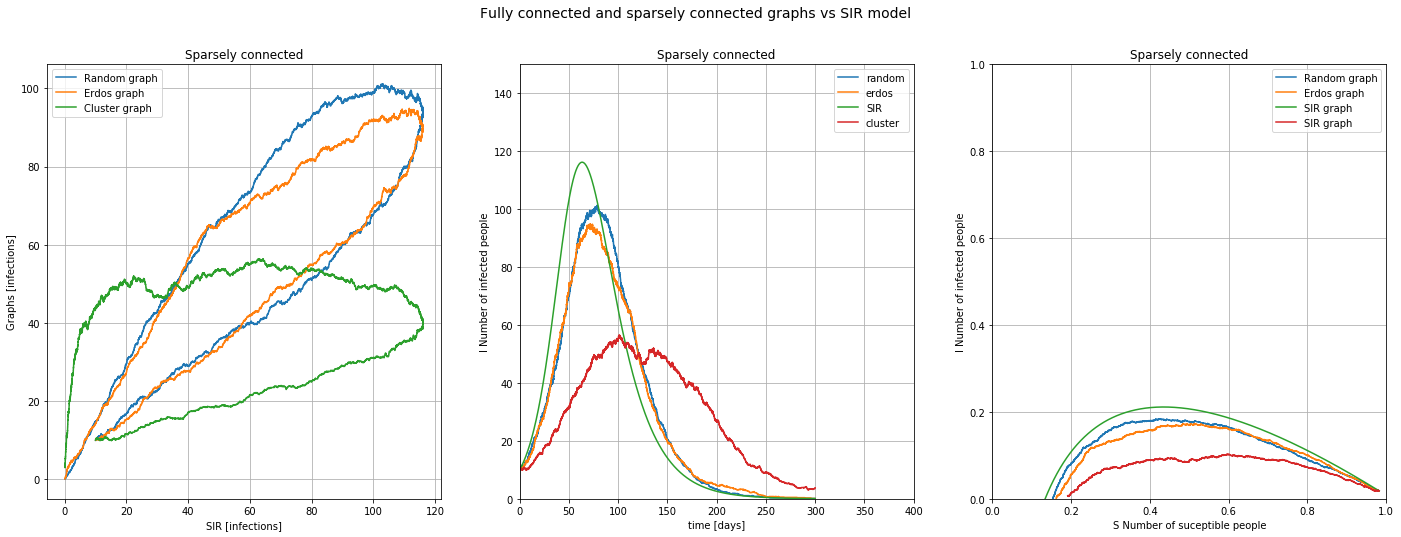

In [18]:
# 1.5.4 - 1.5.5 : Fully connected and sparsely connected graphs vs SIR 

N = 550
nb_clusters = 11
p_intra = 1.0
p_extra = 0.011
I0 = 10 #We start with 10 infected person
R0 = 2.3
gamma = 1.0/20.0
tend = 300
s = 0.1

fig, axes = plt.subplots(ncols=3, figsize=(24,8))
ax = axes.ravel()
    
# Random 
G_rand = nx.random_regular_graph(int(N*s)-1, N, 0)

# Erdos
G_erdos = nx.erdos_renyi_graph(N, s)

# Cluster graph
c_mat = cluster_Graph(N, nb_clusters, p_intra, p_extra)
G_clus = nx.from_numpy_matrix(c_mat.Matrix) #creates graph from binary matrix

# Random simulation
S_rand, I_rand = simulation_graph(G_rand, I0, R0, s, tend, modulation = False)
I_rand = np.mean(I_rand,0)
S_rand = np.mean(S_rand,0)

# Erdos simulation
S_erdos, I_erdos = simulation_graph(G_erdos, I0, R0, s, tend, modulation = False)
I_erdos = np.mean(I_erdos,0)
S_erdos = np.mean(S_erdos,0)

# SIR simulation
_, S_SIR, I_SIR, _ = get_trajectory3_1(gamma, R0, I0, N, tend, modulation= False)

# Cluster simulation
S_clus, I_clus = simulation_graph(G_clus, I0, R0, s, tend, modulation = False)
I_clus = np.mean(I_clus,0)
S_clus = np.mean(S_clus,0)

t = np.linspace(0,tend,tend*100)

# PLOT
ax[0].plot(I_SIR, I_rand, label = 'Random graph')
ax[0].plot(I_SIR, I_erdos, label = 'Erdos graph')
ax[0].plot(I_SIR, I_clus, label = 'Cluster graph')

ax[0].set_xlabel('SIR [infections]')
ax[0].set_ylabel('Graphs [infections]')
ax[0].grid(True, which='both')
ax[0].set_title(titles[ind])
ax[0].legend()

ax[1].plot(t, I_rand, label='random')
ax[1].plot(t, I_erdos, label='erdos')
ax[1].plot(t, I_SIR, label='SIR')
ax[1].plot(t, I_clus, label='cluster')

ax[1].set_xlim([0, 400])
ax[1].set_ylim([0, 150])
ax[1].set_xlabel('time [days]')
ax[1].set_ylabel('I Number of infected people', rotation=90)
ax[1].grid(True, which='both')
ax[1].set_title(titles[ind])
ax[1].legend()

ax[2].plot(S_rand/N, I_rand/N, label = 'Random graph')
ax[2].plot(S_erdos/N, I_erdos/N, label = 'Erdos graph')
ax[2].plot(S_SIR/N, I_SIR/N, label = 'SIR graph')
ax[2].plot(S_clus/N, I_clus/N, label = 'SIR graph')

ax[2].set_xlim([0, 1])
ax[2].set_ylim([0, 1])
ax[2].set_xlabel('S Number of suceptible people')
ax[2].set_ylabel('I Number of infected people', rotation=90)
ax[2].grid(True, which='both')
ax[2].set_title(titles[ind])
ax[2].legend()

fig.suptitle("Fully connected and sparsely connected graphs vs SIR model", fontsize=14)
plt.show()

<b>Answer 1.5.6</b>   
On the first plot form the left, we observe that the cluster graph model is not linear against the SIR model implying that they have different behaviors. This is confirmed in the second plot, we observe that the infection curve for the cluster graph model is wider and the peak is lower. In the cluster model the probability to infect someone from another cluster ($P_{extra}$) is low and so the infections will grow as for the SIR model in the $1^{st}$ cluster but then it would take more time to get people from other cluster to be infected. In our case, we have 5 clusters and we could see it as 5 different SIR populations where in each population the exponential growth is not happening at the same time and with the same intensity. So overall, it will take more time to infect everyone and there would be less infections. So clustering the population, by limiting contacts and circulation of people can help to lower the infections curve. On the third plot, we observe that making clusters is similar as lowering the R0 value in the SIR model, i.e the red curve is lower that the yellow and blue curves in the phase plane. 

<b>Answer 1.5.7</b>   
In the hopfield model, neurons are binary units that takes values {-1, 1}, in our cluster graph it could be infected or susceptible nodes. Every units is connected to every other units with weights $w_{ij} = w_{ji}$, as in the cluster graph where each node is connected to other nodes with a probability ($P_{intra}$ inside the cluster and $P_{extra}$ outside). Now in our example we can consider each cluster as a different population, where within the population units are fully connected. So we could rewrite the weights rule as for excitation and inhibition populations in lecture 6 and use them in the update rule of the hopfield model to determine the state of each unit at the next time step. 


### Bonus (10 points) 
1.5.8 Plot the mean number of infected nodes per cluster over time for one trajectory of the cluster graph. Use the same parameters as 1.5.4. comments [4 points]

1.5.9 Describe three different ways to go from 500 to 1000 neurons in the cluster network. And their impact on the trajectory.  [3 points]
#### Note: Simulations are not mandatory but advised

<b>Answer 1.5.8</b>  

<b>Answer 1.5.9</b>   
In the case we have 10 clusters of 50 neurons, we could : 
    1. increase the number of neurons in each clusters, for example 10 clusters of 100 neurons. 
    2. add new clusters to the network, for example 20 clusters of 50 neurons. 
    3. combine 1 and 2 and randomly add neurons to existing clusters or create new clusters. 

1.5.10 Additional question about the methods:
- Explain why we average over multiple graphs simulations. [1 point]   

The graphs are randomly initialized so averaging ensure reproducible results and in the theory of the mean field model it says that in average if we divide weights by sparsity ($\beta$/s) the model should behave as the fully connected model. 
- Explain the utility of $dt$ when simulating our models.  [1 point] 

To get smoother curves when we plot the simulations.
- In [lecture 7](https://moodle.epfl.ch/pluginfile.php/1781861/mod_resource/content/2/week7new-PopIntro.pdf) we introduced the mean field argument. What difference would you see if we apply the same external current to all nodes between an erdos-rednye vs K-connected graph ? Is the  mean field argument exact (i.e. not an approximation) for any of these networks ?  [1 point]

The erdos-rednye network could contains some isolated vertices so the network is not homogeneous compared to the K-connected graph where the network is homogeneous so the population rate is constant. So the mean field argument is exact for the K-connected network with weights $w_{ij} = \frac{w_{0}}{pN}$
       
        
            
                


# PART 2: Hopfield Network

## Getting Started
As a start, we are going to create a Hopfield network of 25 Neurons with 4 random patterns stored. We will then set the initial state of the network to one of the patterns with some noise and finally run the network for some iterations.

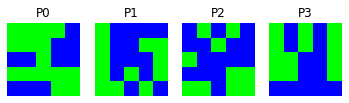

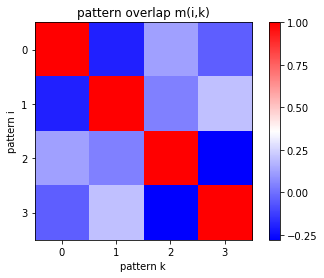

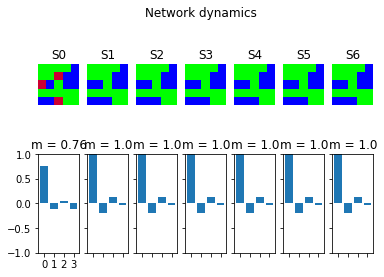

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# add random patterns to the list
pattern_list = factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5)
plot_tools.plot_pattern_list(pattern_list)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## Exercise 2.1: Find the maximum noise tolerance in pattern recovery [6 points]
First we need to set the hopfield network and store some patterns. 

2.1.1. Create a hopfield network with 100 neurons and store 2 random patterns. [1 points]

2.1.2. Run the network for 6 steps after setting as initial state the first of the random patterns with 3 of its bits flipped. Calculate the final overlap with all the patterns. Report if the first pattern was recalled correctly by the network. \
Note: We say that the network has correctly recalled the pattern if the last state has overlap $\geq 0.99$ with the first pattern. [1 points]

2.1.3. Next task is to plot the accuracy of the network vs number of flipped bits. The accuracy is the ratio of trials in which the network correctly recalls a pattern, after the network has been initialized with the same pattern together but with some new noise. \
Note: As you may notice every run is slightly different due to the randomization of the initial noise. You can find the accuracy if you run the same network and patterns for 100 times (with new noise in every iteration) and find the ratio of trials in which the pattern was correctly recalled. [3 points]

2.1.4. Check how fast the accuracy curve drops depending on how many patterns we have stored. What do you believe is going to happen if we increase the number of patterns? (Answer this with one or two sentences). Plot the accuracy vs number of flipped bits curve for several patterns and finally check at which number of stored patterns the accuracy becomes unstable for even one flipped bit. \
Note: The maximum number of stored patterns can vary from simulation to simulation so just give an interval of $\pm 3$ patterns. [1 points] 

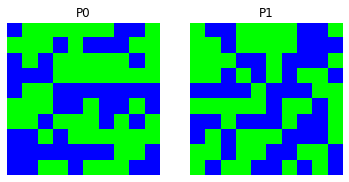

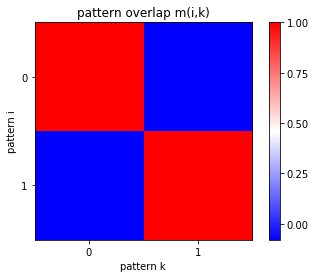

In [4]:
## 2.1.1
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 10
number_of_patterns = 2

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# Create the random patterns 
pattern_list = factory.create_random_pattern_list(number_of_patterns, on_probability=0.5)
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# Update the weights so the hopfield learns the patterns
hopfield_net.store_patterns(pattern_list)

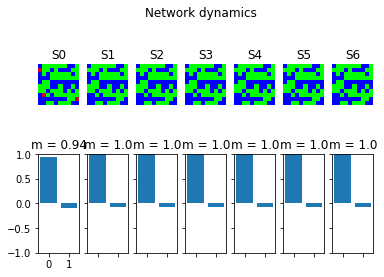

Predicted Correct


In [5]:
## 2.1.2
# Create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# From this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)
# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

# Calculate the overlap and print if you have a recall
states_overlaps = np.empty ([len(pattern_list),len(states_as_patterns)])
for idx in range(len(pattern_list)) :
    states_overlaps[idx] = pattern_tools.compute_overlap_list(pattern_list[idx], states_as_patterns)

if states_overlaps[0,len(states_overlaps)-1] >= 0.99:
    print('Predicted Correct')

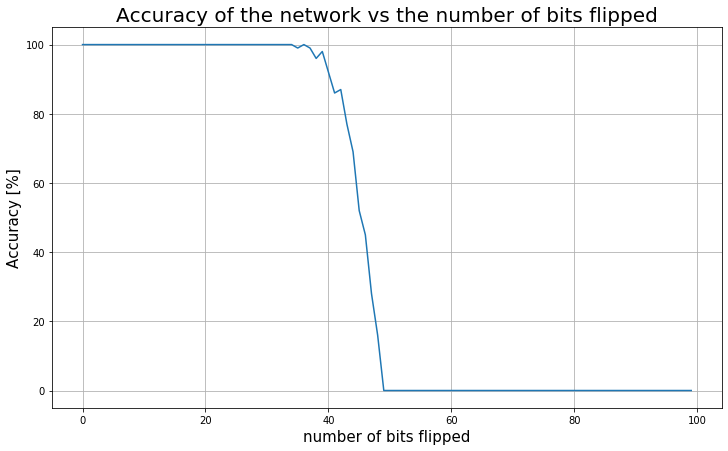

In [6]:
## 2.1.3
import matplotlib.pyplot as plt

# Create a function that has as input the hopfield network, the number of simulation repetitions 
# and the patterns and returns a list with an array with the number of flipped bits and the 
# the corresponding accuracy for that particular "noise level" (# flipped bits)
def accuracy_vs_flipped(hopfield_net, simulation_repetitions, pattern_list):
    nr_of_flips = np.arange(hopfield_net.nrOfNeurons)
    accuracy = np.zeros_like(nr_of_flips) * 1.
    for flip in nr_of_flips:
        tmp = 0.0
        for sim in range(simulation_repetitions):
            
            # Create noise pattern and initialize network with it
            noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=flip)
            hopfield_net.set_state_from_pattern(noisy_init_state)

            
            # from this initial state, let the network dynamics evolve.
            states = hopfield_net.run_with_monitoring(nr_steps=6)
            # each network state is a vector. reshape it to the same shape used to create the patterns.
            states_as_patterns = factory.reshape_patterns(states)
            # Calculate the overlap
            states_overlaps = pattern_tools.compute_overlap_list(pattern_list[0], states_as_patterns)
            # check if the network recalled the pattern
            if states_overlaps[len(states_overlaps)-1] >= 0.99:
                tmp += 1.0

        accuracy[flip] =  (tmp/simulation_repetitions)*100
    return nr_of_flips, accuracy

simulation_runs = 100
nr_of_flipped, accuracy = accuracy_vs_flipped(hopfield_net, simulation_runs, pattern_list)

# Plot the result
plt.figure(figsize=(12,7))
plt.plot(nr_of_flipped, accuracy)
plt.grid(True)
plt.title('Accuracy of the network vs the number of bits flipped', fontsize = 20)
plt.xlabel('number of bits flipped', fontsize = 15)
plt.ylabel('Accuracy [%]', rotation = 90,fontsize=15)
plt.show()

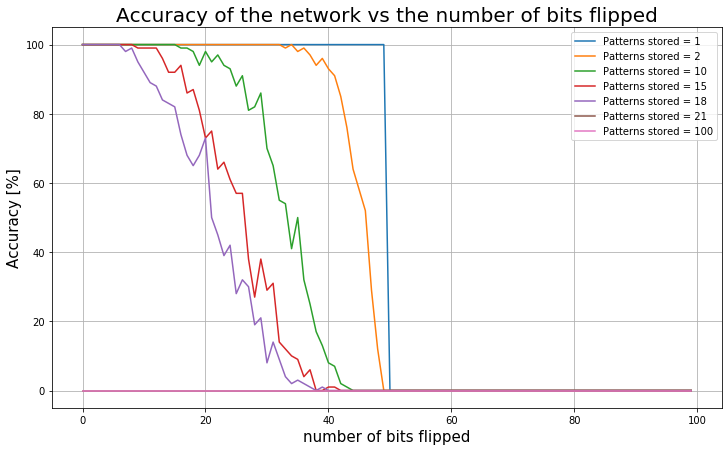

In [7]:
## 2.1.4
# TODO
plt.figure(figsize=(12,7))
patterns_stored = [1, 2, 10, 15, 18, 21,100]
for pat in patterns_stored:
    
    # create an instance of the class HopfieldNetwork (not necessary was to check memory assignement problem but ok)
    hopfield_net_accuracy = network.HopfieldNetwork(nr_neurons= pattern_size**2)

    # Create new patterns and store them in hopfield_net
    pattern_list = factory.create_random_pattern_list(pat, on_probability=0.5)
    # Update the weights so the hopfield learns the patterns
    hopfield_net_accuracy.store_patterns(pattern_list)
    
    nr_of_flipped, accuracy = accuracy_vs_flipped(hopfield_net_accuracy, simulation_runs, pattern_list)
    
    # Plot the result
    plt.plot(nr_of_flipped, accuracy,label='Patterns stored = {p}'.format(p=pat))
    plt.grid(True)
    plt.title('Accuracy of the network vs the number of bits flipped', fontsize = 20)
    plt.xlabel('number of bits flipped', fontsize = 15)
    plt.ylabel('Accuracy [%]', rotation = 90,fontsize=15)
plt.legend()

Answer 2.1.4

The error probability of a neuron grows with the number of stored pattern and if we consider the flipping of each neuron as being independent , we have that the expected number of flips at each update is given by $NP_{error}$. Therefore, the accuracy will drop as a result of the growth of erroneous flips until it cannot retrieve any patterns.

The accuracy becomes unstable even for one one fliped bit at $19 \pm 3$ patterns stored.


# Hopfield Network Capacity [19 points]
In this part of the miniproject we will simulate the Hopfield network and numerically estimate its memory capacity with three different types of stimuli: non-random patterns, balanced random patterns (50% activity), and low-activity random patterns. **The size of the network will always be** $N=100$.

Before starting, it is recommended that you take a look at the example in the grey box in [section 17.2.4](https://neuronaldynamics.epfl.ch/online/Ch17.S2.html) in the book.

## Exercise 2.2: Capacity for non-random patterns: Alphabet [6 points]
We will use patterns in the shape of letters to exemplify non-random patterns. First we load 10 letters and create a list with all patterns.

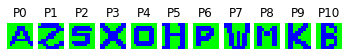

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

# the letters we want to store in the hopfield network
letter_list = ['A', 'Z', 'S', 'X', 'O', 'H', 'P', 'W', 'M', 'K', 'B']
M = len(letter_list)

# create a list using Python's list comprehension syntax
abc_dictionary = pattern_tools.load_alphabet()
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
N = pattern_shape[0]*pattern_shape[1]

# create an instance of the class HopfieldNetwork
hopfield_net_letter = network.HopfieldNetwork(nr_neurons=N)

Now evaluate the capacity of the network. The capacity is defined as $C = \frac{M_{max}}{N}$, where $M_{max}$ is the maximum number of patterns that can be correctly retrieved. To estimate the capacity, you must complete the following steps:

2.2.1. Complete the code for the function ``get_capacity``. This function should return a vector $\mathbf{c} \in \mathbb{R}^M$ where each element $c_i$ ($i=1,2, \dotsc, M$) is the number of of patterns retrieved correctly after first loading $i$ patterns into the network. [4 points]

  To determine if a pattern $\mu$ can be correctly retrieved:
   
  2.2.1.a. initialize the network in $\mu$ with a little noise (1%)
  
  2.2.1.b. run the network dynamics a few steps (3 steps)
  
  2.2.1.c. calculate the overlap between the last state of the network and pattern $\mu$
  
  2.2.1.d. if the overlap is $\geq 0.9$, we consider the pattern to have been correctly retrieved.


2.2.2. Plot the number of successfully retrieved patterns as a function of the number of loaded patterns. [1 points]

2.2.3. Using the plot in 2.2.2., calculate the capacity $C$. **Hint:** *Remember that $M_{max}$ is the maximum number of correctly retrievable patterns, which means the maximum value of $\mathbf{c}$. Use the ``Numpy`` function ``max()`` to find this value.* [1 points]

In [11]:
# 2.2.1
def get_capacity(hopfield_net,pattern_list,M):
    c = np.zeros((M,))
    
    for idx in range(M) :
        
        # Update the weights so the hopfield learns the  first to idx patterns in the pattern list
        hopfield_net.store_patterns(pattern_list[:idx+1])
        tmp = 0.0
        for idy in range(idx+1):
            
            # Create 1% noisy pattern and initialize network with it
            noisy_init_state = pattern_tools.flip_n(pattern_list[idy], nr_of_flips=int(0.01*N))
            hopfield_net.set_state_from_pattern(noisy_init_state)
            
            # from this initial state, let the network dynamics evolve.
            states = hopfield_net.run_with_monitoring(nr_steps=3)
            # each network state is a vector. reshape it to the same shape used to create the patterns.
            states_as_patterns = factory.reshape_patterns(states)
            # compute the overlap between one of the pattern and each of the state of the network during the simulation
            states_overlaps = pattern_tools.compute_overlap_list(pattern_list[idy], states_as_patterns)

            # check if the network recalled the pattern
            if states_overlaps[len(states_overlaps)-1] >= 0.9:
                tmp += 1.0
    
        c[idx] = tmp   
    return c

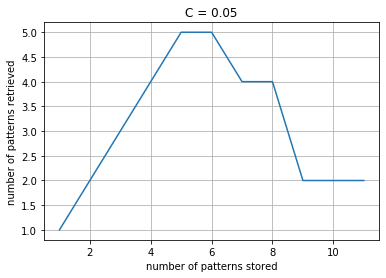

In [12]:
# 2.2.2 and 2.2.3
capacity = get_capacity(hopfield_net_letter,pattern_list,M)
M_max = np.amax(capacity)
C = M_max/N

# plot
fig, ax = plt.subplots()
ax.plot(np.arange(1,M+1), capacity)
ax.set_xlabel('number of patterns stored')
ax.set_ylabel('number of patterns retrieved')
ax.set_title('C = {}'.format(C))
ax.grid(True)

## Exercise 2.3: Capacity for balanced random patterns [2 points]
We will now evaluate the capacity of the network with random patterns with 50% activity. As in the previous case, create a list of all patterns, and then evaluate the capacity with the function ``get_capacity`` (you can use exactly the same function that you defined above).

2.3.1 Plot the number of successfully retrieved patterns vs the number of stored patterns. [1 points]

2.3.2 Calculate $C$. **Hint:** *Remember that $M_{max}$ is the maximum number of correctly retrievable patterns, which means the maximum value of $\mathbf{c}$. Use the ``Numpy`` function ``max()`` to find this value.* [1 points]

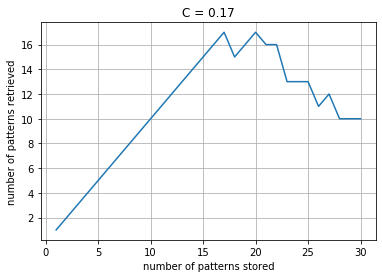

In [18]:
# 2.3
# create a list of patterns
pattern_list_random = factory.create_random_pattern_list(30, on_probability=0.5)
M = len(pattern_list_random)
N = pattern_size**2
# create an instance of the class HopfieldNetwork
hopfield_net_random = network.HopfieldNetwork(nr_neurons=N)
# calculate capacity
capacity = get_capacity(hopfield_net_random,pattern_list_random,M)
M_max = np.amax(capacity)
C = M_max/N

# plot
fig, ax = plt.subplots()
ax.plot(np.arange(1,M+1), capacity)
ax.set_xlabel('number of patterns stored')
ax.set_ylabel('number of patterns retrieved')
ax.set_title('C = {}'.format(C))
ax.grid(True)

## Exercise 2.4: Capacity for low-activity random patterns [11 points]
We now continue by evaluating the capacity of a Hopfield network with low-activity random patterns. To do this, we will diverge slightly from the textbook and use the Hopfield model proposed in the paper by [Tsodyks and Feigel'man (1988)](https://doi.org/10.1209/0295-5075/6/2/002). Given a neuron state $S_i \in \{ -1, 1 \}$, we first define the 0,1-state of the neuron $\sigma_i \in \{ 0, 1 \}$ as
    \begin{equation}
    \sigma_i = \frac{S_i + 1}{2}
    \end{equation}
and the state update function as
    \begin{equation}
    S_i(t+1) = \mathrm{sign} \left( \displaystyle \sum_j^N w_{ij} \sigma_j(t) - \theta \right)
    \end{equation}
where $w_{ij}$ are the synaptic weights and $\theta$ is the neural "firing threshold". Synaptic weights are set according to
    \begin{equation}
    w_{ij} = \frac{1}{a (1-a) N} \displaystyle \sum_\mu^M (\xi_i^\mu - a) (\xi_j^\mu - a)
    \end{equation}
where the patterns $\xi_i^\mu \in \{ 0, 1 \}$ have a probability $a$ of being 1 (this is called the activity or sparseness). This is essentially the regular Hebbian learning rule adjusted for the activity.

**Remember: there should be no self-connections:**
    \begin{equation}
    w_{ii} = 0 \quad \forall i
    \end{equation}

In this setting, the overlap between the network state and a pattern $\xi_i^\mu$ is calculated as
    \begin{equation}
    m^\mu = \frac{1}{a (1-a) N} \displaystyle \sum_i^N (\xi_i^\mu - a) \sigma_i
    \end{equation}
    
To simulate the low-activity Hopfield network, you must complete the following steps:

2.4.1. Complete the code for the new state update function called ``sparse_update_function``. This function must perform the calculation in the second equation above (+1 for numpy implementation). [1 + 1 points]

2.4.2. Complete the code for the new weight learning function called ``calculate_sparse_weights``. This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]

2.4.3. Complete the code for the new overlap function called ``calculate_sparse_overlap``. This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]

2.4.4. Complete the ``get_sparse_capacity`` function to use the new update function, new weight learning rule and the new overlap function. This function should return a vector $\mathbf{c} \in \mathbb{R}^M$ where each element $c_i$ ($i=1,2, \dotsc, M$) is the number of patterns retrieved correctly after first loading $i$ patterns into the network. [2 points]

**Clarification:** In the equations above, the state vector $\mathbf{S}$ is a vector with $N$ elements, one representing each neuron, so $\mathbf{S} \in \mathbb{R}^N$. The pattern vector $\boldsymbol{\xi}$ has the same shape, so $\boldsymbol{\xi} \in \mathbb{R}^N$. However, the patterns produced by ``pattern_tools`` has an $\sqrt{N} \times \sqrt{N}$ matrix shape. To use these patterns in the weight-learning formula, first flatten the pattern: ``ksi=pattern.flatten()``.

**Hint 1:** *``pattern_tools`` gives patterns in -1,+1-format. It needs to be changed to 0,1-format before using the formulas above.*

**Hint 2:** *The calculations in the equations above can be performed using dot products and outer products at the right places. First figure out how to do this, and then use the ``Numpy`` functions ``dot()`` and ``outer()``. This is much faster than looping through arrays.*

**Hint 3:** *To tell the network to use a new state update function, write ``hopfield_net.set_dynamics_to_user_function(update_function=sparse_update_function)``.*

**Hint 4:** *To manually insert a weight matrix into the network, write ``hopfield_net.weights=calculate_sparse_weights(...)``.*

**Hint 5:** *To set the diagonal of the weight matrix to zero ($w_{ii}=0$), use the ``Numpy`` function ``fill_diagonal()``.*

**Hint 6:** *To give the state update function a $\theta$-value, you need to set $\theta$ to the desired value outside the function and before you call the function. If this is done, you can use $\theta$ inside the update function like you normally would (without defining it inside the function). The update function will automatically use the value you used outside the function call. (This is a feature that the Python language has. If a variable has not been defined inside a function, it will use the variable value that is available outside the function.)*

Next, you need to estimate the capacity of the low-activity Hopfield network. To do this, you first need to optimize the threshold parameter $\theta$, i.e. find the $\theta$ that maximizes the storage capacity. **In the following exercises, when testing the capacity, you don't need to store more than 100 patterns. In other words, you can set this as the maximum number of patterns to store when testing the capacity of the network.**

2.4.5. Set $a=0.5$ and calculate the capacity $C$ like in the previous exercise for various threshold values $-1 \leq \theta \leq 1 $. Plot $C$ vs $\theta$. Which $\theta$ maximizes the capacity? [1 points]

2.4.6. Now set the activity to $a=0.1$ and then $a=0.05$. Again, for both these cases, calculate the capacity $C$ for various threshold values $-1 \leq \theta \leq 1 $ and plot $C$ vs $\theta$. How does the capacity $C$ of the low-activity networks compare to the balanced case of $a=0.5$? [2 points]

In [19]:
# 2.4.1

def sparse_update_function(S0, weights):
    S0 = (S0+1)/2
    S1 = np.sign(np.dot(weights,S0)-theta)
    return S1

In [20]:
# 2.4.2
def calculate_sparse_weights(pattern_list, a):
    
    #compute the constants
    c = 1.0/(a*(1.0-a))
    N = pattern_list[0].shape[0]**2
    # initialize the weight matrix
    weight_matrix = np.zeros((N,N))
    # iterate over each pattern and compute the outer product of the pattern with itself 
    # It correspond to a weight matrix for a single pattern
    # Sum each outer product of the pattern
    for pat in pattern_list :
        pat = ((pat.flatten()+1)/2)-a
        weight_matrix += np.outer(pat,pat)
    np.fill_diagonal(weight_matrix,0)
    weight_matrix = (c/N)*weight_matrix
    return weight_matrix

In [21]:
# 2.4.3
def calculate_sparse_overlap(S, pattern, a):
    
    # Compute some constants
    c = 1.0/(a*(1.0-a))
    N = pattern.shape[0]**2
    # compute S as sigma
    S = (S.flatten()+1)/2
    pattern = pattern.flatten()-a
    #compute the overlap by flattening the pattern into 1d vector and computing the dot product between them
    overlap = (c/N)*(np.dot(pattern,S))
    
    return overlap

In [23]:
# 2.4.4
def get_sparse_capacity(hopfield_net,pattern_list,M,a):
    
    c = np.zeros((M,))
    # Set the update rule of the network to the sparse model
    hopfield_net.set_dynamics_to_user_function(update_function=sparse_update_function)
    for idx in range(M) :
        
        # Update the weights so the hopfield learns the first to  idx patterns in the pattern list
        hopfield_net.weights = calculate_sparse_weights(pattern_list[:idx+1], a)
        tmp = 0.0
        for idy in range(idx+1):
            
            # Create 1% noisy pattern and initialize network with it
            noisy_init_state = pattern_tools.flip_n(pattern_list[idy], nr_of_flips=int(0.01*N))
            hopfield_net.set_state_from_pattern(noisy_init_state)
            
            # from this initial state, let the network dynamics evolve.
            states = hopfield_net.run_with_monitoring(nr_steps=3)
            # each network state is a vector. reshape it to the same shape used to create the patterns.
            states_as_patterns = factory.reshape_patterns(states)
                        
            # compute the overlap between one of the pattern and each of the state of the network during the simulation
            states_overlaps = calculate_sparse_overlap(states_as_patterns[len(states_as_patterns)-1],((pattern_list[idy]+1)/2),a) 
            # check if the network recalled the pattern
            if states_overlaps >= 0.9:
                tmp += 1.0
        c[idx] = tmp
    return c

The maximum capacities are  [0.12 0.33 0.44] for the respective theta values [-0.02040816  0.55102041  0.46938776]


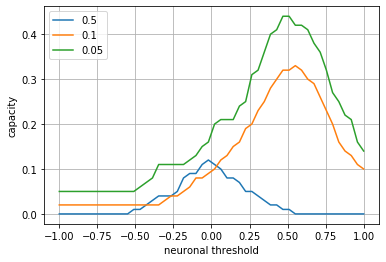

In [24]:
# 2.4.5 and 2.4.6
N = 100
a_vec = np.array([0.5, 0.1, 0.05])
theta_vec = np.linspace(-1.0,1.0,50)

# create an instance of the class HopfieldNetwork
hopfield_net_low_activity = network.HopfieldNetwork(nr_neurons=N)

C_vec = np.empty((a_vec.shape[0],theta_vec.shape[0]))
for a,idy in zip(a_vec,range(a_vec.shape[0])) :
    # create a list of patterns
    pattern_list_low_activity = factory.create_random_pattern_list(100, on_probability=a)
    M = len(pattern_list_low_activity)

    for theta,idx in zip(theta_vec,range(theta_vec.shape[0])):
        # calculate the capacity
        capacity = get_sparse_capacity(hopfield_net_low_activity,pattern_list_low_activity,M,a)
        M_max = np.amax(capacity)
        C_vec[idy,idx] = M_max/N


theta_max = theta_vec[np.argmax(C_vec, axis = 1)]
print('The maximum capacities are  {c} for the respective theta values {theta}'.format(c = np.amax(C_vec,axis = 1),theta = theta_max))
# plot
fig, ax = plt.subplots()
ax.plot(theta_vec, C_vec[0])
ax.plot(theta_vec, C_vec[1])
ax.plot(theta_vec, C_vec[2])
ax.set_xlabel('neuronal threshold')
ax.set_ylabel('capacity')
ax.legend(a_vec)
ax.grid(True)

Answer 2.4.5

The theta that maximizes the capacitiy for random patterns (a=0.5) is -0.02 according to the value computed above and the curve's shape is symmetric aoround it. This is close to zero and confirmed the use of an update function without neuronal threshold to compute the maximum capacity storage of random pattern as we did before.

Answer 2.4.6

We can see that for low-activity pattern the use of a specific neuronal threshold can enhance significantly the performance of the network. In fact, the capacity of both low-activity network (a = 0.1 and a = 0.05) are respectively 0.33 and 0.44 ( shifted to the right with symmetric shape) for 0.55 and 0.47 values of threshold. This shows that low-activity patterns with adapted neuronal threshold can perform three to four times better than random patterns in memory retrieval and is likely to happen in the human brain according to neuronal data ([Tsodyks and Feigel'man (1988)](https://doi.org/10.1209/0295-5075/6/2/002)).